In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
data = np.genfromtxt('data.txt', names=True)
n = len(data['x'])

In [56]:
print(data)

[(0.5488, 0.8243, 0.0529) (0.7152, 1.1299, 0.1548)
 (0.6028, 0.8912, 0.0912) (0.5449, 0.7326, 0.1137)
 (0.4237, 0.7115, 0.0038) (0.6459, 1.0423, 0.1235)
 (0.4376, 0.7381, 0.1224) (0.8918, 1.2995, 0.1234)
 (0.9637, 1.2154, 0.1887) (0.3834, 0.6087, 0.1364)
 (0.7917, 1.1072, 0.0719) (0.5289, 0.8154, 0.0874)
 (0.568 , 0.782 , 0.1395) (0.9256, 1.2761, 0.012 )
 (0.071 , 0.2337, 0.1334) (0.0871, 0.1807, 0.1341)
 (0.0202, 0.063 , 0.0421) (0.8326, 1.2118, 0.0258)
 (0.7782, 1.0834, 0.0631) (0.87  , 1.2433, 0.0727)
 (0.9786, 1.433 , 0.114 ) (0.7992, 1.175 , 0.0877)
 (0.4615, 0.9862, 0.1977) (0.7805, 1.1181, 0.0204)
 (0.1183, 0.2984, 0.0418) (0.6399, 0.9602, 0.0323)
 (0.1434, 0.2053, 0.1306) (0.9447, 1.2868, 0.0507)
 (0.5218, 0.809 , 0.0933) (0.4147, 0.7025, 0.0489)]


In [65]:
data.dtype.names

('x', 'y', 'y_std')

In [123]:
x = data['x']
y = data['y']
y_std = data['y_std']

In [124]:
print(x)

[0.5488 0.7152 0.6028 0.5449 0.4237 0.6459 0.4376 0.8918 0.9637 0.3834
 0.7917 0.5289 0.568  0.9256 0.071  0.0871 0.0202 0.8326 0.7782 0.87
 0.9786 0.7992 0.4615 0.7805 0.1183 0.6399 0.1434 0.9447 0.5218 0.4147]


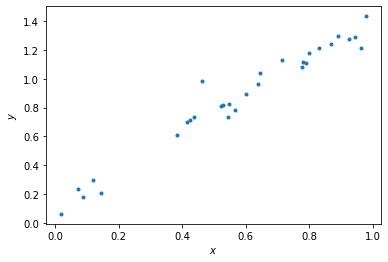

In [125]:
plt.plot(x, y, '.')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

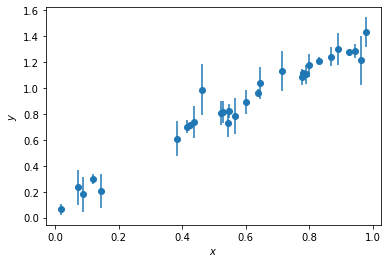

In [126]:
# plt.plot(x, y, 'o')
plt.errorbar(x, y, yerr = y_std, fmt = 'o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [155]:
X = np.concatenate((np.ones(n).reshape((-1, 1)), np.array(x).reshape((-1, 1))), axis=1)
X = np.concatenate((X, np.square(x).reshape(-1, 1)), axis=1)
X.shape

(30, 3)

In [157]:
E = np.zeros((n, n), 'f8')
np.fill_diagonal(E, np.square(y_std))
E_inv = np.linalg.inv(E)

In [158]:
C = np.linalg.inv(np.dot(np.dot(X.T, E_inv), X))

In [159]:
opt_params = np.dot(np.dot(C, X.T), np.dot(E_inv, y))

In [160]:
opt_params.shape

(3,)

In [161]:
print(opt_params)

[ 0.06881084  1.69306943 -0.42081551]


In [162]:
print(C)

[[ 0.00113475 -0.00393959  0.00299221]
 [-0.00393959  0.01404456 -0.01090727]
 [ 0.00299221 -0.01090727  0.00872368]]


In [174]:
def best_fit(x, p):
    return p[0] + p[1]*x + p[2]*np.square(x)

In [175]:
sampling = np.linspace(0, 1, 50)
y_sampling = fit(sampling, opt_params)

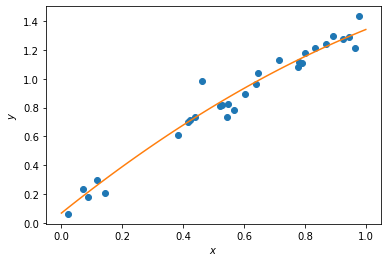

In [176]:
plt.plot(x, y, 'o')
plt.plot(sampling, y_sampling)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()